# Classification Tree

## Problem 1 : Predicting CentralAir using SalePrice

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

In [3]:
traindata=pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Data type : ", type(traindata))
print("Data dims : ", traindata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [5]:
print(traindata.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [6]:
saleprice=pd.DataFrame(traindata['SalePrice'])  
centralair=pd.DataFrame(traindata['CentralAir'])      

In [7]:
centralair.describe()

,CentralAir
count,1460
unique,2
top,Y
freq,1365


In [8]:
saleprice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


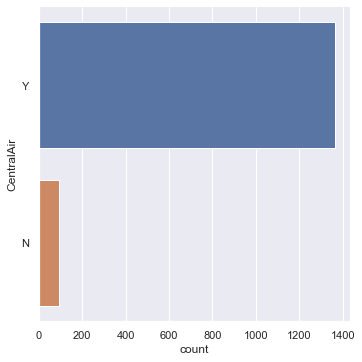

In [9]:
# Count Plot for CentralAir 
sb.catplot(y = "CentralAir", data = centralair, kind = "count")

In [10]:
centralair["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

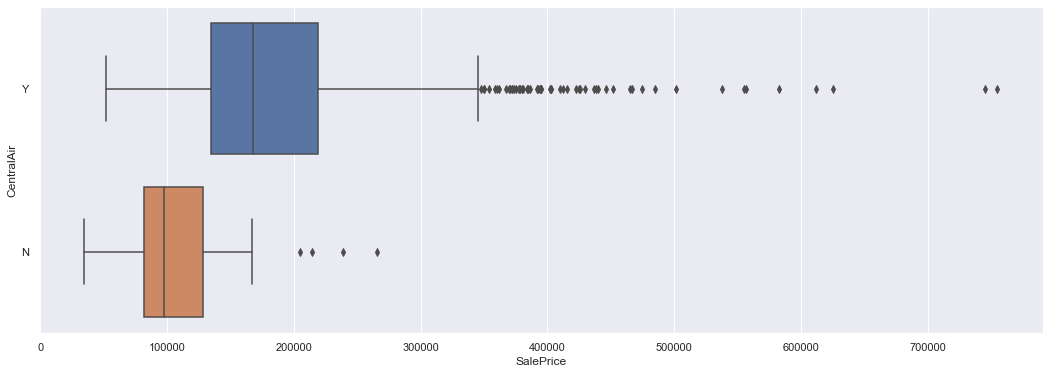

In [11]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([saleprice, centralair], axis = 1).reindex(saleprice.index)

# Boxplot of CentralAir against SalePrice
f = plt.figure(figsize=(18, 6))
sb.boxplot(data = trainDF, x = "SalePrice", y = "CentralAir", orient="h")

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

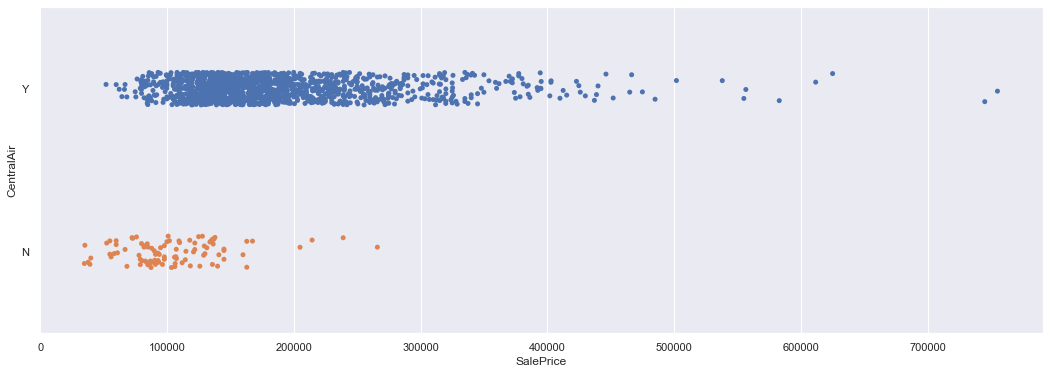

In [12]:
# Joint Stripplot of CentralAir against SalePrice 
f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

In [13]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [14]:
# Train Set : 1100 samples
saleprice_train = pd.DataFrame(saleprice[:1100])
centralair_train = pd.DataFrame(centralair[:1100])

# Test Set : 360 samples
saleprice_test = pd.DataFrame(saleprice[-360:])
centralair_test = pd.DataFrame(centralair[-360:])

# Check the sample sizes
print("Train Set :", saleprice_train.shape, centralair_train.shape)
print("Test Set  :", saleprice_test.shape, centralair_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [15]:
# Train the Decision Tree Classifier model
dectree.fit(saleprice_train, centralair_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'SalePrice <= 107450.0\ngini = 0.125\nsamples = 1100\nvalue = [74, 1026]\nclass = Y'),
 Text(167.4, 326.16, 'SalePrice <= 79250.0\ngini = 0.474\nsamples = 119\nvalue = [46, 73]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.444\nsamples = 24\nvalue = [16, 8]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.432\nsamples = 95\nvalue = [30, 65]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 145125.0\ngini = 0.055\nsamples = 981\nvalue = [28, 953]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.128\nsamples = 305\nvalue = [21, 284]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.02\nsamples = 676\nvalue = [7, 669]\nclass = Y')]

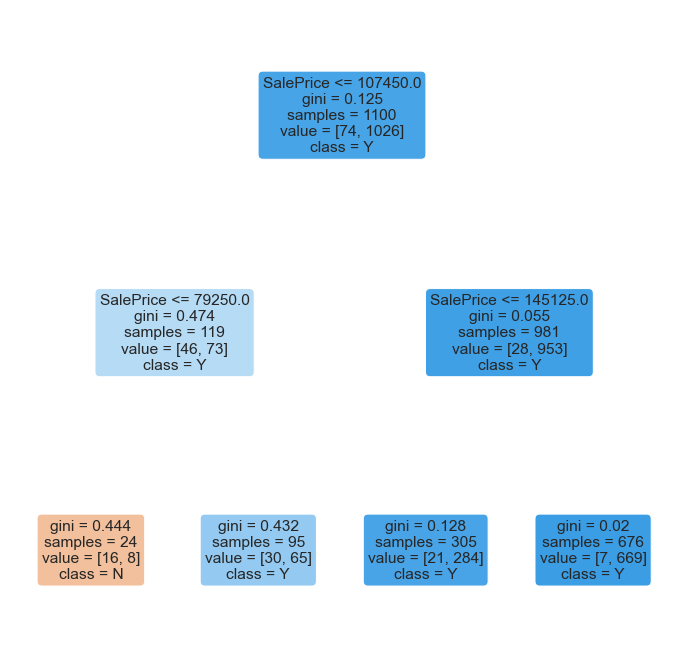

In [16]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

Classification Accuracy 	: 0.94


<AxesSubplot:>

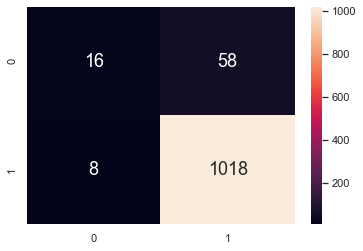

In [17]:
# Predict CentralAir train corresponding to SalePrice train
centralair_train_pred = dectree.predict(saleprice_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(saleprice_train, centralair_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_train, centralair_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [18]:
CM=confusion_matrix(centralair_train,centralair_train_pred)
TN=CM[0][0]
TP=CM[1][1]
FP=CM[0][1]
FN=CM[1][0]

In [19]:
print("TPR:", (TP/(TP+FN)))
print("TNR:", (TN/(TN+FP)))
print("FPR:",(FP/(FP+TN)))
print("FNR:", (FN/(FN+TP)))

TPR: 0.9922027290448343
TNR: 0.21621621621621623
FPR: 0.7837837837837838
FNR: 0.007797270955165692


In [20]:
# Test the Decision Tree Classifier model
dectree.fit(saleprice_test, centralair_test)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'SalePrice <= 91250.0\ngini = 0.11\nsamples = 360\nvalue = [21, 339]\nclass = Y'),
 Text(167.4, 326.16, 'SalePrice <= 62250.0\ngini = 0.492\nsamples = 16\nvalue = [9, 7]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.486\nsamples = 12\nvalue = [5, 7]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.067\nsamples = 344\nvalue = [12, 332]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.192\nsamples = 102\nvalue = [11, 91]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.008\nsamples = 242\nvalue = [1, 241]\nclass = Y')]

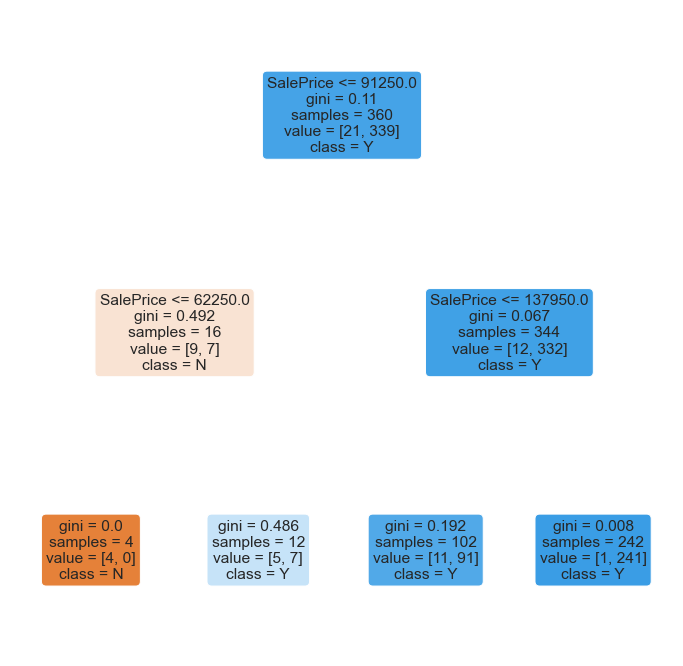

In [21]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

Classification Accuracy 	: 0.9527777777777777


<AxesSubplot:>

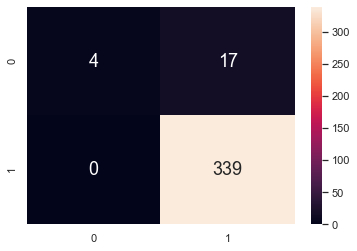

In [22]:
# Predict CentralAir Test corresponding to SalePrice Test
centralair_test_pred = dectree.predict(saleprice_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(saleprice_test, centralair_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_test, centralair_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [23]:
CM=confusion_matrix(centralair_test,centralair_test_pred)
TN=CM[0][0]
TP=CM[1][1]
FP=CM[0][1]
FN=CM[1][0]

In [24]:
print("TPR:", (TP/(TP+FN)))
print("TNR:", (TN/(TN+FP)))
print("FPR:",(FP/(FP+TN)))
print("FNR:", (FN/(FN+TP)))

TPR: 1.0
TNR: 0.19047619047619047
FPR: 0.8095238095238095
FNR: 0.0


## Problem 2 : Predicting CentralAir using Other Variables

## GrLivArea

In [25]:
grlivarea=pd.DataFrame(traindata['GrLivArea'])
grlivarea.describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


<AxesSubplot:xlabel='GrLivArea', ylabel='CentralAir'>

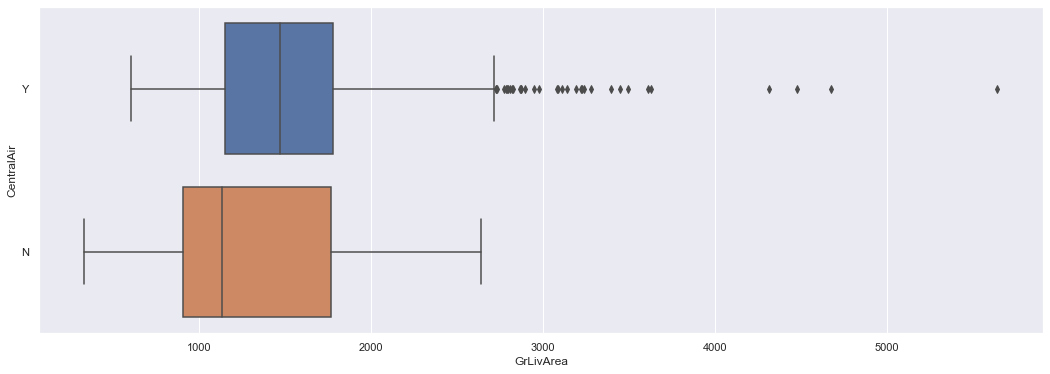

In [26]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([grlivarea, centralair], axis = 1).reindex(grlivarea.index)

# Boxplot of CentralAir against GrLivArea
f = plt.figure(figsize=(18, 6))
sb.boxplot(data = trainDF, x = "GrLivArea", y = "CentralAir", orient="h")

<AxesSubplot:xlabel='GrLivArea', ylabel='CentralAir'>

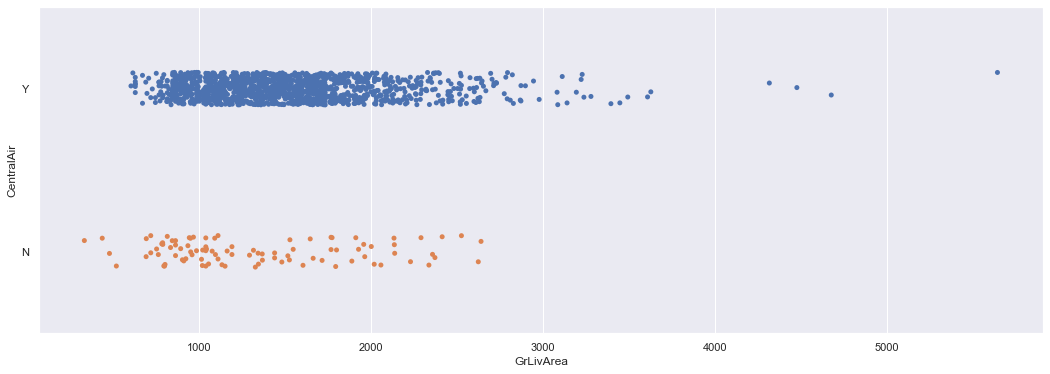

In [27]:
# Joint Stripplot of CentralAir against GrLivArea
f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "GrLivArea", y = "CentralAir", data = trainDF, orient = "h")

In [28]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [29]:
grlivarea_train = pd.DataFrame(grlivarea[:1100])
grlivarea_test = pd.DataFrame(grlivarea[-360:])

# Check the sample sizes
print("Train Set :", grlivarea_train.shape, centralair_train.shape)
print("Test Set  :", grlivarea_test.shape, centralair_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [30]:
# Train the Decision Tree Classifier model
dectree.fit(grlivarea_train, centralair_train)

DecisionTreeClassifier(max_depth=2)

[Text(267.84000000000003, 543.6, 'GrLivArea <= 562.5\ngini = 0.125\nsamples = 1100\nvalue = [74, 1026]\nclass = Y'),
 Text(133.92000000000002, 326.16, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(401.76000000000005, 326.16, 'GrLivArea <= 846.5\ngini = 0.121\nsamples = 1097\nvalue = [71, 1026]\nclass = Y'),
 Text(267.84000000000003, 108.72000000000003, 'gini = 0.359\nsamples = 47\nvalue = [11, 36]\nclass = Y'),
 Text(535.6800000000001, 108.72000000000003, 'gini = 0.108\nsamples = 1050\nvalue = [60, 990]\nclass = Y')]

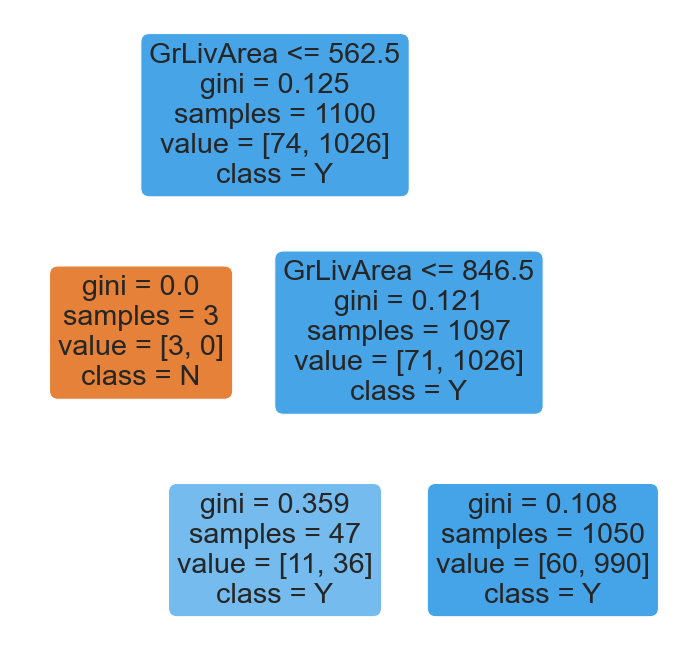

In [31]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree,filled=True, rounded=True, 
          feature_names=["GrLivArea"],
          class_names=["N","Y"])

Classification Accuracy 	: 0.9354545454545454


<AxesSubplot:>

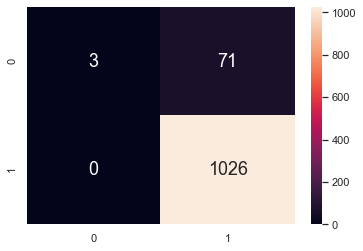

In [32]:
# Predict CentralAir Train corresponding to GrLivArea Train
centralair_train_pred = dectree.predict(grlivarea_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(grlivarea_train, centralair_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_train, centralair_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [33]:
CM=confusion_matrix(centralair_train,centralair_train_pred)
TN=CM[0][0]
TP=CM[1][1]
FP=CM[0][1]
FN=CM[1][0]

In [34]:
print("TPR:", (TP/(TP+FN)))
print("TNR:", (TN/(TN+FP)))
print("FPR:",(FP/(FP+TN)))
print("FNR:", (FN/(FN+TP)))

TPR: 1.0
TNR: 0.04054054054054054
FPR: 0.9594594594594594
FNR: 0.0


In [35]:
# Test the Decision Tree Classifier model
dectree.fit(grlivarea_test, centralair_test)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'GrLivArea <= 800.0\ngini = 0.11\nsamples = 360\nvalue = [21, 339]\nclass = Y'),
 Text(167.4, 326.16, 'GrLivArea <= 782.0\ngini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = N'),
 Text(502.20000000000005, 326.16, 'GrLivArea <= 1045.0\ngini = 0.087\nsamples = 349\nvalue = [16, 333]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.212\nsamples = 58\nvalue = [7, 51]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.06\nsamples = 291\nvalue = [9, 282]\nclass = Y')]

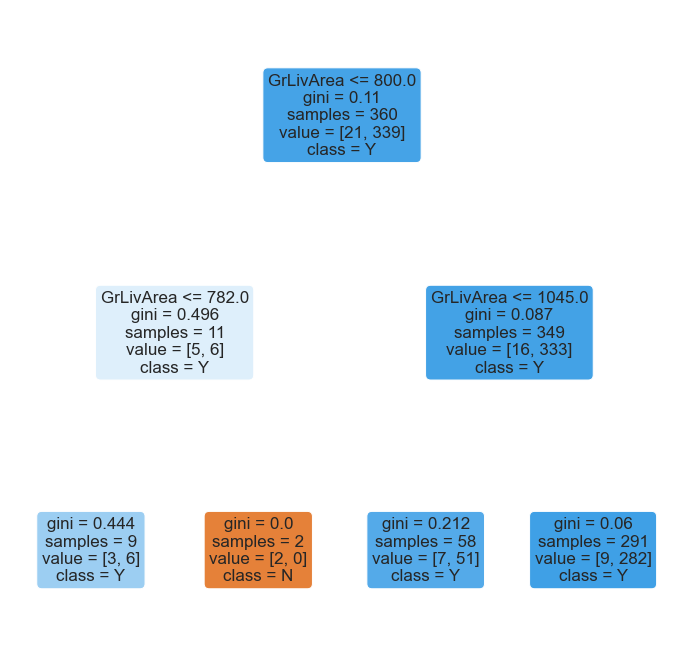

In [36]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["GrLivArea"], 
          class_names=["N","Y"])

Classification Accuracy 	: 0.9472222222222222


<AxesSubplot:>

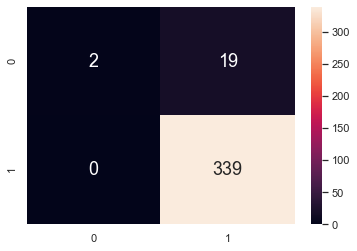

In [37]:
# Predict CentralAir Test corresponding to GrLivArea Test
centralair_test_pred = dectree.predict(grlivarea_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(grlivarea_test, centralair_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_test, centralair_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [38]:
CM=confusion_matrix(centralair_test,centralair_test_pred)
TN=CM[0][0]
TP=CM[1][1]
FP=CM[0][1]
FN=CM[1][0]

In [39]:
print("TPR:", (TP/(TP+FN)))
print("TNR:", (TN/(TN+FP)))
print("FPR:",(FP/(FP+TN)))
print("FNR:", (FN/(FN+TP)))

TPR: 1.0
TNR: 0.09523809523809523
FPR: 0.9047619047619048
FNR: 0.0


## OverallQual

In [40]:
overallqual=pd.DataFrame(traindata['OverallQual'])
overallqual.describe()

,OverallQual
count,1460.000000
mean,6.099315
std,1.382997
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


<AxesSubplot:xlabel='OverallQual', ylabel='CentralAir'>

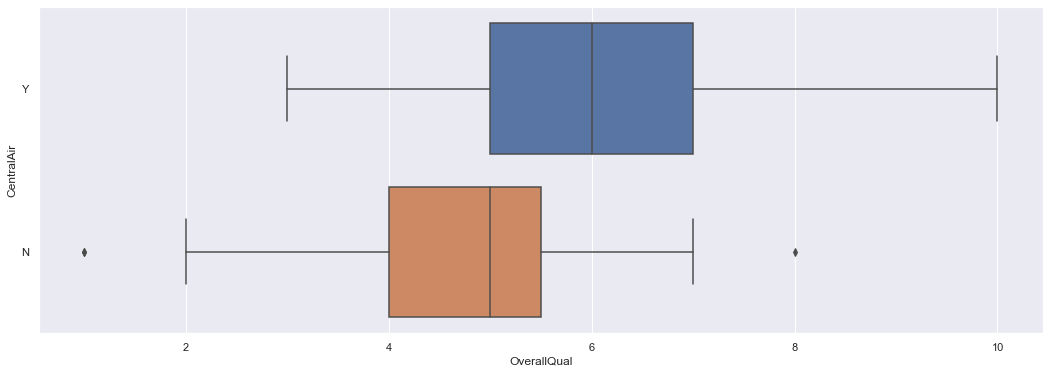

In [41]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([overallqual, centralair], axis = 1).reindex(overallqual.index)

# Boxplot of CentralAir against OverallQual
f = plt.figure(figsize=(18, 6))
sb.boxplot(data = trainDF, x = "OverallQual", y = "CentralAir", orient="h")

<AxesSubplot:xlabel='OverallQual', ylabel='CentralAir'>

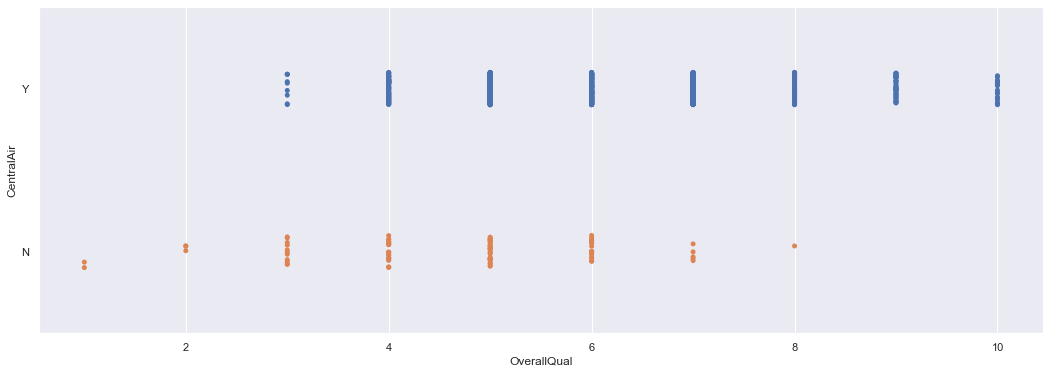

In [42]:
# Joint Stripplot of CentralAir against OverallQual
f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "OverallQual", y = "CentralAir", data = trainDF, orient = "h")

In [43]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [44]:
overallqual_train = pd.DataFrame(overallqual[:1100])
overallqual_test = pd.DataFrame(overallqual[-360:])

# Check the sample sizes
print("Train Set :", grlivarea_train.shape, centralair_train.shape)
print("Test Set  :", grlivarea_test.shape, centralair_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [45]:
# Train the Decision Tree Classifier model
dectree.fit(overallqual_train, centralair_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'OverallQual <= 3.5\ngini = 0.125\nsamples = 1100\nvalue = [74, 1026]\nclass = Y'),
 Text(167.4, 326.16, 'OverallQual <= 2.5\ngini = 0.432\nsamples = 19\nvalue = [13, 6]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.48\nsamples = 15\nvalue = [9, 6]\nclass = N'),
 Text(502.20000000000005, 326.16, 'OverallQual <= 5.5\ngini = 0.106\nsamples = 1081\nvalue = [61, 1020]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.208\nsamples = 382\nvalue = [45, 337]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.045\nsamples = 699\nvalue = [16, 683]\nclass = Y')]

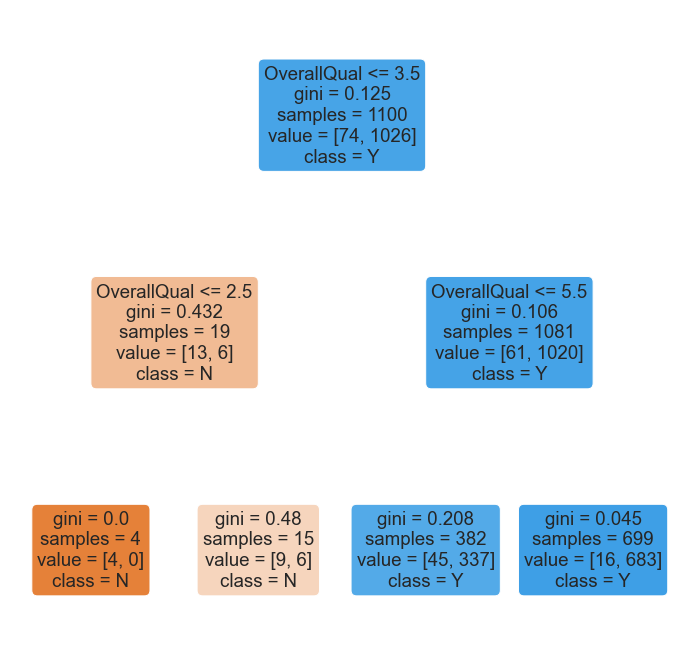

In [46]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree,filled=True, rounded=True, 
          feature_names=["OverallQual"],
          class_names=["N","Y"])

Classification Accuracy 	: 0.9390909090909091


<AxesSubplot:>

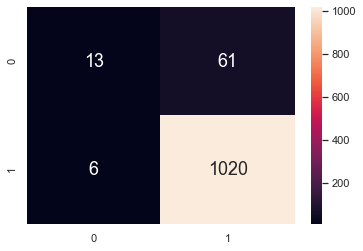

In [47]:
# Predict CentralAir Train corresponding to OverallQual Train
centralair_train_pred = dectree.predict(overallqual_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(overallqual_train, centralair_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_train, centralair_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [48]:
CM=confusion_matrix(centralair_train,centralair_train_pred)
TN=CM[0][0]
TP=CM[1][1]
FP=CM[0][1]
FN=CM[1][0]

In [49]:
print("TPR:", (TP/(TP+FN)))
print("TNR:", (TN/(TN+FP)))
print("FPR:",(FP/(FP+TN)))
print("FNR:", (FN/(FN+TP)))

TPR: 0.9941520467836257
TNR: 0.17567567567567569
FPR: 0.8243243243243243
FNR: 0.005847953216374269


In [50]:
# Test the Decision Tree Classifier model
dectree.fit(overallqual_test, centralair_test)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'OverallQual <= 4.5\ngini = 0.11\nsamples = 360\nvalue = [21, 339]\nclass = Y'),
 Text(167.4, 326.16, 'OverallQual <= 2.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.339\nsamples = 37\nvalue = [8, 29]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'OverallQual <= 6.5\ngini = 0.072\nsamples = 322\nvalue = [12, 310]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.099\nsamples = 192\nvalue = [10, 182]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.03\nsamples = 130\nvalue = [2, 128]\nclass = Y')]

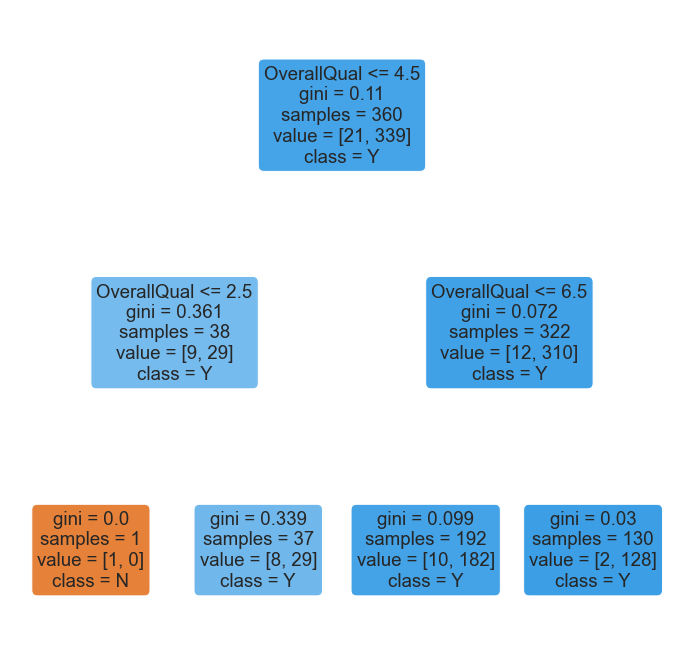

In [51]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["N","Y"])

Classification Accuracy 	: 0.9444444444444444


<AxesSubplot:>

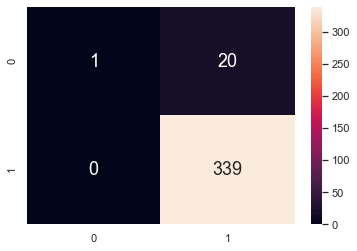

In [52]:
# Predict CentralAir Test corresponding to OverallQual Test
centralair_test_pred = dectree.predict(overallqual_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(overallqual_test, centralair_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_test, centralair_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [53]:
CM=confusion_matrix(centralair_test,centralair_test_pred)
TN=CM[0][0]
TP=CM[1][1]
FP=CM[0][1]
FN=CM[1][0]

In [54]:
print("TPR:", (TP/(TP+FN)))
print("TNR:", (TN/(TN+FP)))
print("FPR:",(FP/(FP+TN)))
print("FNR:", (FN/(FN+TP)))

TPR: 1.0
TNR: 0.047619047619047616
FPR: 0.9523809523809523
FNR: 0.0


## YearBuilt

In [55]:
yearbuilt=pd.DataFrame(traindata['YearBuilt'])
yearbuilt.describe()

,YearBuilt
count,1460.000000
mean,1971.267808
std,30.202904
min,1872.000000
25%,1954.000000
50%,1973.000000
75%,2000.000000
max,2010.000000


<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

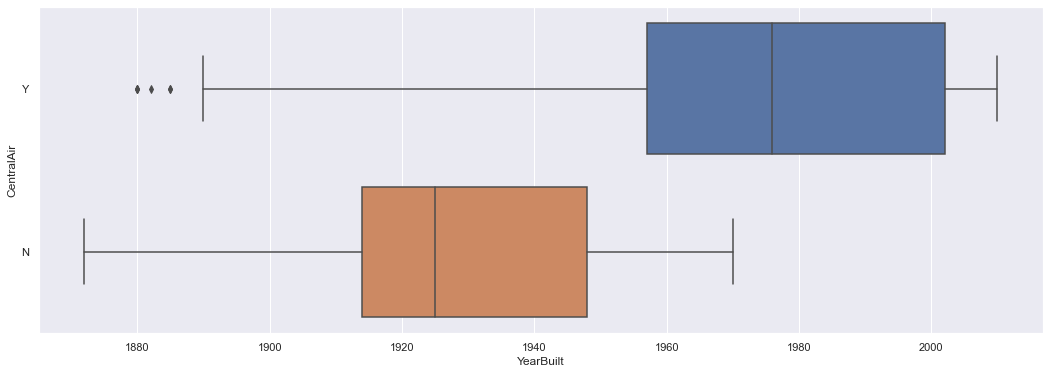

In [56]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([yearbuilt, centralair], axis = 1).reindex(yearbuilt.index)

# Boxplot of CentralAir against YearBuilt
f = plt.figure(figsize=(18, 6))
sb.boxplot(data = trainDF, x = "YearBuilt", y = "CentralAir", orient="h")

<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

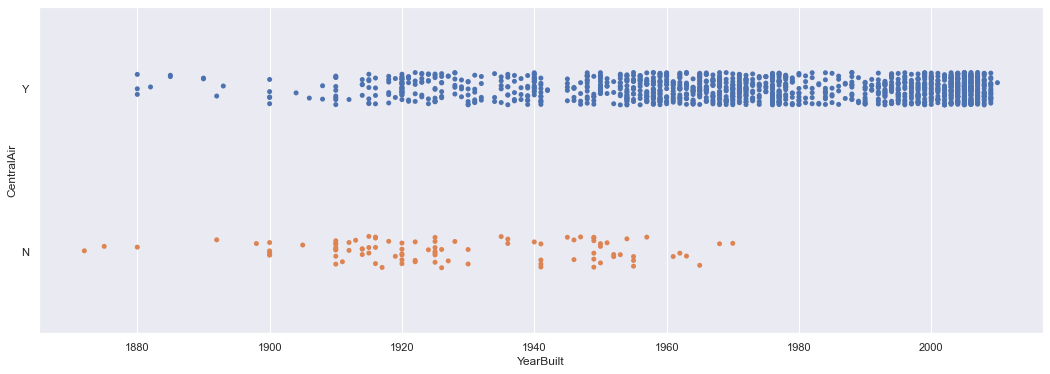

In [57]:
# Joint Stripplot of CentralAir against YearBuilt
f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "YearBuilt", y = "CentralAir", data = trainDF, orient = "h")

In [58]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [59]:
yearbuilt_train = pd.DataFrame(yearbuilt[:1100])
yearbuilt_test = pd.DataFrame(yearbuilt[-360:])

# Check the sample sizes
print("Train Set :", yearbuilt_train.shape, centralair_train.shape)
print("Test Set  :", yearbuilt_test.shape, centralair_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [60]:
# Train the Decision Tree Classifier model
dectree.fit(yearbuilt_train, centralair_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'YearBuilt <= 1928.5\ngini = 0.125\nsamples = 1100\nvalue = [74, 1026]\nclass = Y'),
 Text(167.4, 326.16, 'YearBuilt <= 1895.5\ngini = 0.444\nsamples = 129\nvalue = [43, 86]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.455\nsamples = 120\nvalue = [42, 78]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'YearBuilt <= 1955.5\ngini = 0.062\nsamples = 971\nvalue = [31, 940]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.244\nsamples = 169\nvalue = [24, 145]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.017\nsamples = 802\nvalue = [7, 795]\nclass = Y')]

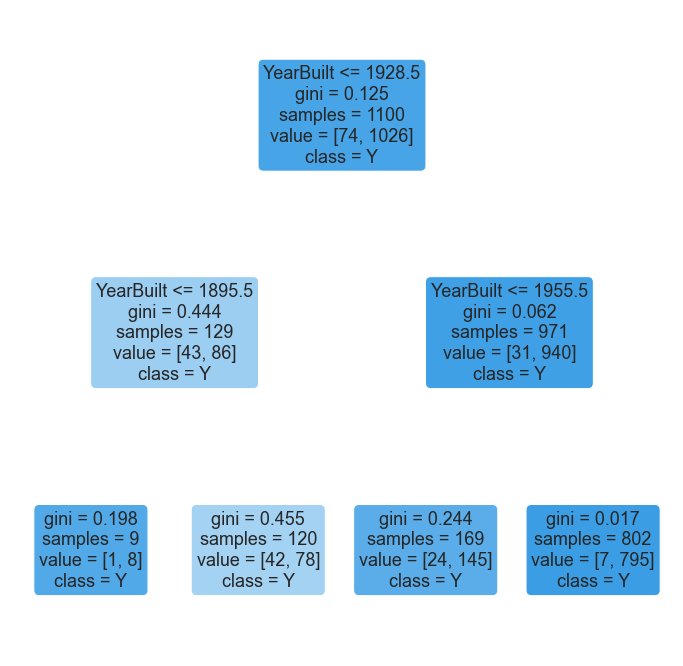

In [61]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree,filled=True, rounded=True, 
          feature_names=["YearBuilt"],
          class_names=["N","Y"])

Classification Accuracy 	: 0.9327272727272727


<AxesSubplot:>

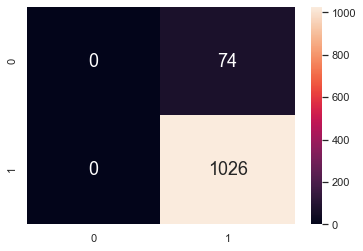

In [62]:
# Predict CentralAir Train corresponding to YearBuilt Train
centralair_train_pred = dectree.predict(yearbuilt_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(yearbuilt_train, centralair_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_train, centralair_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [63]:
CM=confusion_matrix(centralair_train,centralair_train_pred)
TN=CM[0][0]
TP=CM[1][1]
FP=CM[0][1]
FN=CM[1][0]

In [64]:
print("TPR:", (TP/(TP+FN)))
print("TNR:", (TN/(TN+FP)))
print("FPR:",(FP/(FP+TN)))
print("FNR:", (FN/(FN+TP)))

TPR: 1.0
TNR: 0.0
FPR: 1.0
FNR: 0.0


In [65]:
# Test the Decision Tree Classifier model
dectree.fit(yearbuilt_test, centralair_test)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'YearBuilt <= 1917.5\ngini = 0.11\nsamples = 360\nvalue = [21, 339]\nclass = Y'),
 Text(167.4, 326.16, 'YearBuilt <= 1877.5\ngini = 0.488\nsamples = 19\nvalue = [11, 8]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.498\nsamples = 17\nvalue = [9, 8]\nclass = N'),
 Text(502.20000000000005, 326.16, 'YearBuilt <= 1952.0\ngini = 0.057\nsamples = 341\nvalue = [10, 331]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.231\nsamples = 75\nvalue = [10, 65]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.0\nsamples = 266\nvalue = [0, 266]\nclass = Y')]

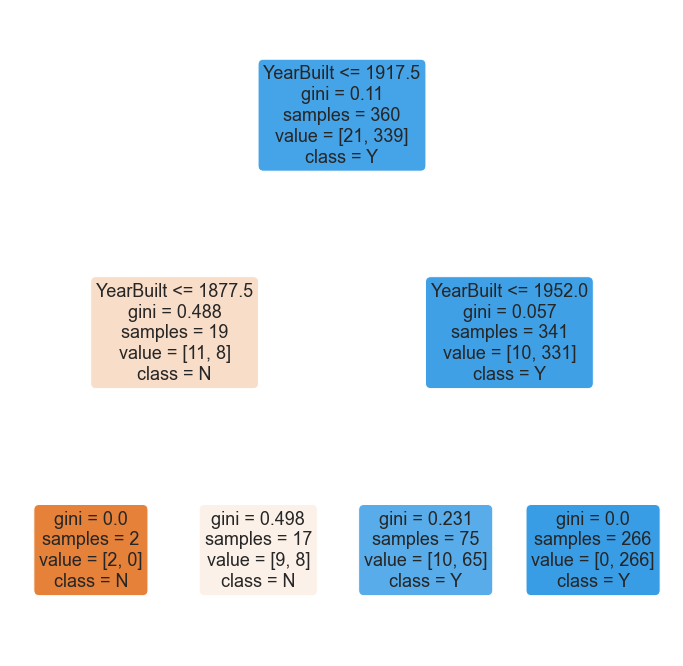

In [66]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["N","Y"])

Classification Accuracy 	: 0.95


<AxesSubplot:>

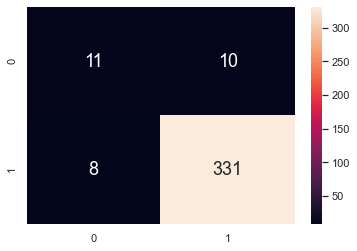

In [67]:
# Predict CentralAir Test corresponding to YearBuilt Test
centralair_test_pred = dectree.predict(yearbuilt_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(yearbuilt_test, centralair_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_test, centralair_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [68]:
CM=confusion_matrix(centralair_test,centralair_test_pred)
TN=CM[0][0]
TP=CM[1][1]
FP=CM[0][1]
FN=CM[1][0]

In [69]:
print("TPR:", (TP/(TP+FN)))
print("TNR:", (TN/(TN+FP)))
print("FPR:",(FP/(FP+TN)))
print("FNR:", (FN/(FN+TP)))

TPR: 0.976401179941003
TNR: 0.5238095238095238
FPR: 0.47619047619047616
FNR: 0.02359882005899705


## Problem 3 : Best Uni-Variate Model to Predict CentralAir

### SalePrice
#### Train data: 
- Classification Accuracy 	: 0.94
- TPR: 0.9922027290448343
- FPR: 0.7837837837837838

#### Test data:
- Classification Accuracy 	: 0.9527777777777777
- TPR: 1.0
- FPR: 0.8095238095238095

### GrLivArea
#### Train data:
- Classification Accuracy 	: 0.9354545454545454
- TPR: 1.0
- FPR: 0.9594594594594594

#### Test data:
- Classification Accuracy 	: 0.9472222222222222
- TPR: 1.0
- FPR: 0.9047619047619048

### Overall Qual
#### Train data: 
- Classification Accuracy 	: 0.9390909090909091
- TPR: 0.9941520467836257
- FPR: 0.8243243243243243

#### Test data:
- Classification Accuracy 	: 0.9444444444444444
- TPR: 1.0
- FPR: 0.9523809523809523

### YearBuilt
#### Train data:
- Classification Accuracy 	: 0.9327272727272727
- TPR: 1.0
- FPR: 1.0

#### Test data:
- Classification Accuracy 	: 0.9416666666666667
- TPR: 1.0
- FPR: 1.0

SalePrice model has the highest classification accuracy for both train and test data while YearBuilt model has the lowest classification accuracy for both train and test data.

SalePrice has the highest True Positive Rate and relatively low True Negative Rate for both train and test data. 

Hence, SalePrice is the best univariate classification tree to predict CentralAir.